<a href="https://colab.research.google.com/github/kgupt07/handwriting-detection-using-NN/blob/main/ffnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
np.random.seed(0)

In [ ]:
data = pd.read_csv('/content/sample_data/mnist_test.csv')
#read data above
data = np.array(data)
data.shape
#convert data from a dataframe to an array
#note: in the csv dataset, the images are intitally stored as flattened rows, hence the final array is 2d

(9999, 785)

In [ ]:
np.random.shuffle(data)

In [ ]:
split_index = int(0.8 * data.shape[0])
training_data = data[:split_index]
testing_data = data[split_index:]
print(training_data.shape)
print(testing_data.shape)

(7999, 785)
(2000, 785)


In [ ]:
#splitting the data into x: the actual image part and y: the label.
data_X = training_data[ : ,1:]
data_Y = training_data[ : ,0]
print("Example X data: " + str(data_X[0]))
print("Example Y data: " + str(data_Y[0]))

Example X data: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  68 255 121   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 151
 254 250 221  74  33   0   0   0   

In [ ]:
#lets define prameters!!

#defining sigmoid: smoothening activation function to make our function non-linear
def sigmoid(x):
  return 1/(1+np.exp(-x))

#defining its derivative:
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

#defining loss function: mean square error with a factor of 0.5
def loss_function(Y, Y_hat):
  return 0.5 * np.sum(np.square(Y-Y_hat))/Y.shape[0]
  # the 0.5 exists there to a. cleaner math: derivative wont have factor
  # and b. it also works as a scaling for the learning rate.

#defining derivative of loss function wrt Y_hat
def loss_function_derivative(Y, Y_hat):
  return (Y_hat-Y)/Y.shape[0]

In [ ]:
#lets turn the label to 'one-hot-ecoding' basically make the final fully
# connected layer of our ffn

def convert_to_one_hot(Y):
  num_data_points = Y.shape[0]
  num_classes = Y.max() + 1
  Y_one_hot = np.zeros((num_data_points, num_classes))
  Y_one_hot[np.arange(num_data_points), Y] = 1
  return Y_one_hot

  #arrange basically generates an array from 0 to the num_data_points and
  #feeds it through so we can set the relevant a_ij to 1.

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        #initializing layer sizes
        self.input_size = input_size          #784 = 28*28
        self.hidden_size = hidden_size        #16
        self.output_size = output_size        #10 coz we have 10 classes of nums
        #initializing our 2 weight matrices
        self.w1 = np.random.randn(self.input_size, self.hidden_size)
        self.w2 = np.random.randn(self.hidden_size, self.output_size)
        #initializing the bias values
        self.b1 = np.zeros(self.hidden_size)
        self.b2 = np.zeros(self.output_size)

    def forward_pass(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward_pass(self, X, Y, learning_rate):
      loss = loss_function(Y, self.a2)   #loss is a number

      dL_da2 = loss_function_derivative(Y, self.a2)  #this is an array
      da2_dz2 = sigmoid_derivative(self.z2)
      dL_dz2 = dL_da2 * da2_dz2
      dz2_dw2 = self.a1

      # calcuate the gradient of the loss with respect to w2
      dL_dw2 = np.dot(dz2_dw2.T, dL_dz2)
      # calculate the gradient of the loss with respect to b2
      dL_db2 = np.sum(dL_dz2, axis=0)

      dz2_da1 = self.w2
      da1_dz1 = sigmoid_derivative(self.z1)
      dL_dz1 = np.dot(dL_dz2, dz2_da1.T) * da1_dz1
      dz1_dw1 = X

      # calculate the gradient of the loss with respect to w1
      dL_dw1 = np.dot(dz1_dw1.T, dL_dz1)
      # calculate the gradient of the loss with respect to b1
      dL_db1 = np.sum(dL_dz1, axis=0)

      # update the weights and biases
      self.w2 -= learning_rate * dL_dw2
      self.b2 -= learning_rate * dL_db2
      self.w1 -= learning_rate * dL_dw1
      self.b1 -= learning_rate * dL_db1

      return loss

  #function to return only a subset of the trianing data so we dont use all of it at once
    def get_batch(self, X, Y, batch_size = 32):
      num_data_points = X.shape[0]
      indices = np.random.choice(num_data_points, batch_size)
      return X[indices], Y[indices]

    def train(self, X, Y, epochs, learning_rate):
      num_batches = X.shape[0] // 32

      for epoch in range(epochs):
        #lr = learning_rate * (0.001 ** (epoch // 10))
        for batch in range(num_batches):
          X_batch, Y_batch = self.get_batch(X, Y)
          self.forward_pass(X_batch)
          loss = self.backward_pass(X_batch, Y_batch, learning_rate)
        print("Epoch: " + str(epoch) + " Loss: " + str(loss))

    def predict(self, X):
      return self.forward_pass(X)

    def accuracy(self, X, Y):
      Y_hat = self.predict(X)
      Y_hat = np.argmax(Y_hat, axis=1)
      return np.mean(Y_hat == Y)

In [ ]:
neuralnetwork = NeuralNetwork(784, 16, 10)

training_data_Y_one_hot = convert_to_one_hot(data_Y)

# Use a subset of the data for testing
training_data_X = data_X[:9000]
training_data_Y = training_data_Y_one_hot[:9000]
testing_data_X = data_X[9000:]
testing_data_Y = data_Y[9000:]

neuralnetwork.train(training_data_X, training_data_Y, 1000, 0.1)

print(neuralnetwork.accuracy(data_X, data_Y))

Epoch: 0 Loss: 0.45798455217006323
Epoch: 1 Loss: 0.48514202350084495
Epoch: 2 Loss: 0.4814566475639192
Epoch: 3 Loss: 0.42234509369158746
Epoch: 4 Loss: 0.48000854680850136
Epoch: 5 Loss: 0.4342143803047607
Epoch: 6 Loss: 0.4453405109482904
Epoch: 7 Loss: 0.42775440595186953
Epoch: 8 Loss: 0.4328276649342512
Epoch: 9 Loss: 0.4346038232815497
Epoch: 10 Loss: 0.39485271984932846
Epoch: 11 Loss: 0.49326968629224516
Epoch: 12 Loss: 0.36115734433777424
Epoch: 13 Loss: 0.3697170794124844
Epoch: 14 Loss: 0.41724559230745073
Epoch: 15 Loss: 0.3695800743937754
Epoch: 16 Loss: 0.44378415394791176
Epoch: 17 Loss: 0.3771783684218062
Epoch: 18 Loss: 0.32532132836046856
Epoch: 19 Loss: 0.28999838927837507
Epoch: 20 Loss: 0.35535661746302416
Epoch: 21 Loss: 0.37541797348793876
Epoch: 22 Loss: 0.3708604662574978
Epoch: 23 Loss: 0.36888421603809235
Epoch: 24 Loss: 0.3248458027911554
Epoch: 25 Loss: 0.33260780729194167
Epoch: 26 Loss: 0.29562716606468253
Epoch: 27 Loss: 0.3430148601528541
Epoch: 28 Los

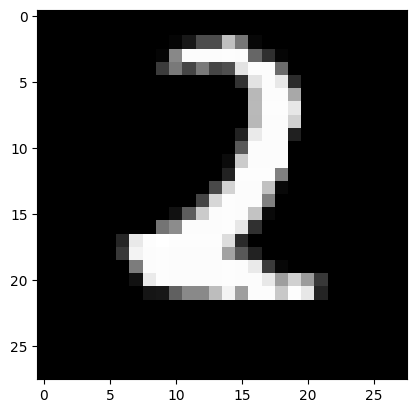

Predicted: 2


In [ ]:
def plot_image(X):
    plt.imshow(X.reshape(28, 28), cmap='gray')
    plt.show()

data_point = np.random.random_integers(1, 7999)
X = data_X[data_point]
plot_image(X)

Y = data_Y[data_point]
Y_hat = neuralnetwork.predict(X)

print("Predicted: " + str(np.argmax(Y_hat)))